In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('D:\\Downloads\\Down\\FFT_project\\Project\\forecasting (ml)\\data3.csv')

In [3]:
df.head(5)

,0,-0.061186
0,0.00004,-0.053024
1,0.00008,0.073594
2,0.00012,-0.179009
3,0.00016,-0.016872
4,0.00020,0.014743


In [4]:
df.columns=['Time','Fault']
df.head(5)

,Time,Fault
0,0.00004,-0.053024
1,0.00008,0.073594
2,0.00012,-0.179009
3,0.00016,-0.016872
4,0.00020,0.014743


In [6]:
#df.set_index("Time",inplace=True)

In [5]:
df.head(5)

,Time,Fault
0,0.00004,-0.053024
1,0.00008,0.073594
2,0.00012,-0.179009
3,0.00016,-0.016872
4,0.00020,0.014743


In [6]:
df['Fault'].isnull().sum()

0

In [7]:
df.describe()

,Time,Fault
count,47999.00000,47999.000000
mean,0.96000,-0.003874
std,0.55425,0.187270
min,0.00004,-2.138630
25%,0.48002,-0.087278
50%,0.96000,-0.001411
75%,1.43998,0.084018
max,1.91996,1.638010


<Axes: ylabel='Density'>

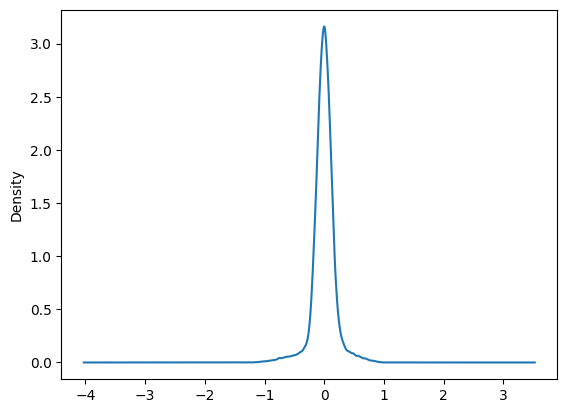

In [8]:
df['Fault'].plot(kind='kde')

Observation:
 1. All the values lies between 0 and 1 implies of standard distribution 
 2. Gaussian Distribution

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(df['Fault'])

ADF Statistics: -25.215495731675237
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [12]:

x=df['Fault']
x

0       -0.053024
1        0.073594
2       -0.179009
3       -0.016872
4        0.014743
           ...   
47994   -0.043414
47995   -0.265752
47996   -0.207242
47997   -0.051284
47998   -0.033014
Name: Fault, Length: 47999, dtype: float64

In [13]:
y=df['Time']
y

0        0.00004
1        0.00008
2        0.00012
3        0.00016
4        0.00020
          ...   
47994    1.91980
47995    1.91984
47996    1.91988
47997    1.91992
47998    1.91996
Name: Time, Length: 47999, dtype: float64

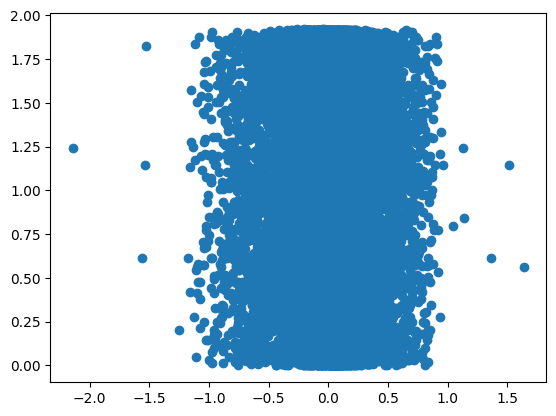

In [14]:
plt.scatter(x,y)

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

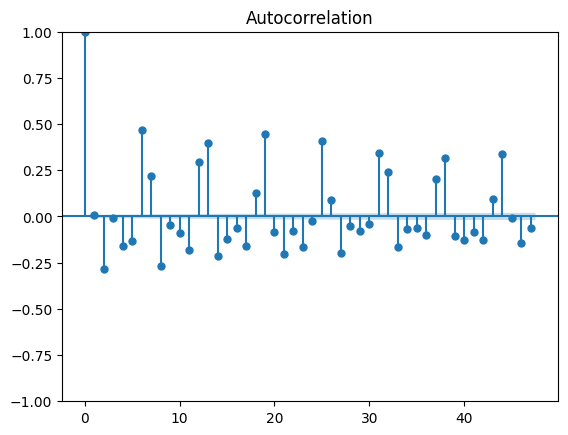

In [16]:
acf=plot_acf(df['Fault'].dropna())

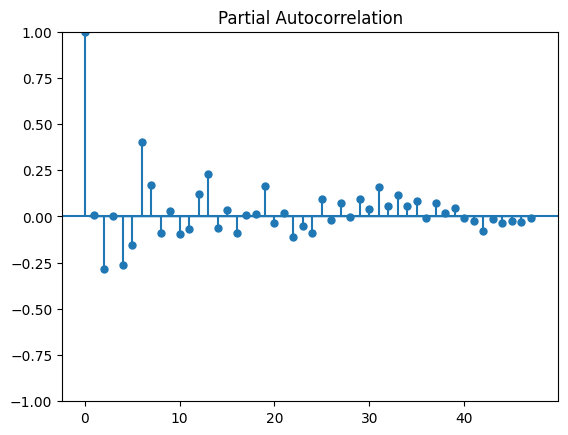

In [17]:
pacf=plot_pacf(df['Fault'].dropna())

Implementation using Time as feature

In [18]:
train=df.iloc[:40000,:]

In [19]:
train

,Time,Fault
0,0.00004,-0.053024
1,0.00008,0.073594
2,0.00012,-0.179009
3,0.00016,-0.016872
4,0.00020,0.014743
...,...,...
39995,1.59984,0.756468
39996,1.59988,0.153172
39997,1.59992,0.100294
39998,1.59996,-0.090915


In [22]:
test=df.iloc[40001:,:]

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
model_SARIMA=SARIMAX(train['Fault'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [25]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\ABISH\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Fault   No. Observations:                40000
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                8051.090
Date:                             Thu, 24 Aug 2023   AIC                         -16084.180
Time:                                     10:54:51   BIC                         -16006.813
Sample:                                          0   HQIC                        -16059.691
                                           - 40000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6714      0.028    -59.759      0.000      -1.726      -1.617
ar.L2         -1.6364      0.023    -70.096      0.000      -1.682      -1.591
ar.L3         -0.7980      0.026    -30.520      0.000      -0.849      -0.747
ma.L1          1.5931      0.029     55.668      0.000       1.537       1.649
ma.L2          1.3865      0.022     62.050      0.000       1.343       1.430
ma.L3          0.4268      0.021     20.096      0.000       0.385       0.468
ma.L4         -0.1695      0.012    -14.080      0.000      -0.193      -0.146
ma.L5          0.0362      0.005      7.431      0.000       0.027       0.046
sigma2         0.0395      0.000    225.655      0.000       0.039       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             27005.87
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
last=len(df)
end=40000
train=df.iloc[:end,:]
train

,Time,Fault
0,0.00004,-0.053024
1,0.00008,0.073594
2,0.00012,-0.179009
3,0.00016,-0.016872
4,0.00020,0.014743
...,...,...
39995,1.59984,0.756468
39996,1.59988,0.153172
39997,1.59992,0.100294
39998,1.59996,-0.090915


In [40]:
test=df.iloc[40001:last,:]

In [41]:
test

,Time,Fault
40001,1.60008,0.241387
40002,1.60012,0.112750
40003,1.60016,-0.060699
40004,1.60020,-0.148172
40005,1.60024,-0.072620
...,...,...
47994,1.91980,-0.043414
47995,1.91984,-0.265752
47996,1.91988,-0.207242
47997,1.91992,-0.051284


In [43]:
forecast_feature1 = model_SARIMA_fit.get_prediction(start=train.index[0], end=train.index[-1])

In [44]:
forecast_feature1

In [45]:
predicted_feature1 = forecast_feature1.predicted_mean

In [46]:
predicted_feature1

0        0.000000e+00
1        3.862335e-10
2        9.292656e-11
3        7.350208e-12
4        2.565590e-09
             ...     
39995    3.103253e-01
39996    1.242964e-01
39997   -2.530749e-01
39998   -1.612170e-01
39999    3.178935e-02
Name: predicted_mean, Length: 40000, dtype: float64

In [50]:
x=train[['Fault']]

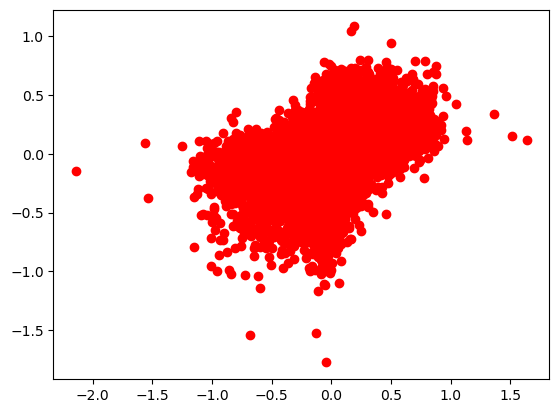

In [59]:
plt.scatter(x,predicted_feature1,c='red')

In [56]:
resiuduals=train['Fault']-predicted_feature1
resiuduals

0       -0.053024
1        0.073593
2       -0.179009
3       -0.016872
4        0.014743
           ...   
39995    0.446143
39996    0.028876
39997    0.353369
39998    0.070302
39999   -0.071907
Length: 40000, dtype: float64

<Axes: ylabel='Density'>

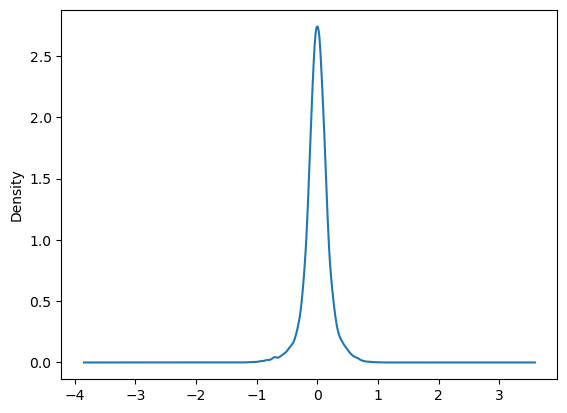

In [57]:
resiuduals.plot(kind='kde')

In [60]:
train['predicted']=predicted_feature1

C:\Users\ABISH\AppData\Local\Temp\ipykernel_15696\662139946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predicted']=predicted_feature1


In [61]:
train

,Time,Fault,predicted
0,0.00004,-0.053024,0.000000e+00
1,0.00008,0.073594,3.862335e-10
2,0.00012,-0.179009,9.292656e-11
3,0.00016,-0.016872,7.350208e-12
4,0.00020,0.014743,2.565590e-09
...,...,...,...
39995,1.59984,0.756468,3.103253e-01
39996,1.59988,0.153172,1.242964e-01
39997,1.59992,0.100294,-2.530749e-01
39998,1.59996,-0.090915,-1.612170e-01


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [62]:
actual=train['Fault']
predicted=train['predicted']

In [63]:
mae = mean_absolute_error(actual, predicted)

In [65]:

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.13943560870627056
Mean Squared Error (MSE): 0.039133857870932175
Root Mean Squared Error (RMSE): 0.19782279411365156


<Axes: >

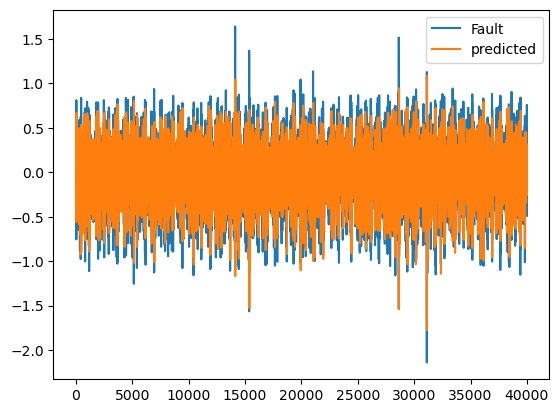

In [66]:
train[['Fault','predicted']].plot()

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(actual, predicted))

target_range = np.max(actual) - np.min(actual)

percentage_accuracy = (1.0 - (rmse / target_range)) * 100

NameError: name 'actual' is not defined